In [35]:
import os
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [ ]:
data_directory = "C:\\Users\\irina\\Documents\\UH\\Vizualization in Data Science DL\\suncharge\\data"
files = os.listdir(data_directory)
for file in files:
    print(file)

In [60]:
# source_directory = data_directory
# destination_directory = data_directory
# # Make sure the destination directory exists
# os.makedirs(data_directory, exist_ok=True)

# # Loop through all files in the source directory
# for filename in os.listdir(source_directory):
#     if filename.endswith('.csv'):  # Check if the file is a CSV
#         file_path = os.path.join(source_directory, filename)
        
#         # Read the CSV file into a DataFrame
#         df = pd.read_csv(file_path)
        
#         # Check and remove the "Unnamed: 0" column if it exists
#         if 'Unnamed: 0' in df.columns:
#             df = df.drop('Unnamed: 0', axis=1)
        
#         # Write the DataFrame back to a new CSV file without the unwanted column
#         destination_file_path = os.path.join(destination_directory, filename)
#         df.to_csv(destination_file_path, index=False)  # Set index=False to avoid writing row numbers as a separate column

# print("All files have been processed.")

All files have been processed.


In [78]:
bom_file = os.path.join(data_directory, 'bom.csv')
bom = pd.read_csv(bom_file)
print(bom.head(5))
print(bom.shape)

   Material                        Component                 Product Category  \
0  EVCB-001                              NaN              EV Car Battery - FP   
1    BC-001                    Battery Cells                    Battery Cells   
2   BMS-001  Battery Management System (BMS)  Battery Management System (BMS)   
3    CF-001                     Cooling Fans        Thermal Management System   
4    CF-002                     Cooling Fans        Thermal Management System   

  Finished Product  
0   EV Car Battery  
1   EV Car Battery  
2   EV Car Battery  
3   EV Car Battery  
4   EV Car Battery  
(42, 4)


In [76]:
cpr_file = os.path.join(data_directory, 'CustomerPlantRelation.csv')
cpr = pd.read_csv(cpr_file)
print(cpr)
#print(cpr.shape)

   CustomerCountry  PlantKey
0          Belgium         4
1          Croatia         6
2   Czech Republic         5
3          Denmark         8
4          Estonia         8
5          Finland         8
6           France         6
7          Germany         4
8           Greece         5
9          Hungary         5
10           Italy         6
11          Latvia         8
12       Lithuania         8
13     Netherlands         4
14          Norway         8
15          Poland         5
16        Portugal         6
17        Slovenia         6
18           Spain         6
19          Sweden         8
20     Switzerland         6
21  United Kingdom         7


In [63]:
cust_file = os.path.join(data_directory, 'Customers.csv')
cust = pd.read_csv(cust_file)
print(cust.head(2))
print(cust.shape)

   CustomerKey                CustomerName CustomerCountry CustomerCity  \
0            1             O'Hara-MacGyver         Germany      Hamburg   
1            2  Smitham, Lind and Lindgren         Germany      München   

  CustomerPostalCode     CustomerStreet  PlantKey  
0              22041  36 Westport Court         4  
1              81679   934 Shelley Lane         4  
(1227, 7)


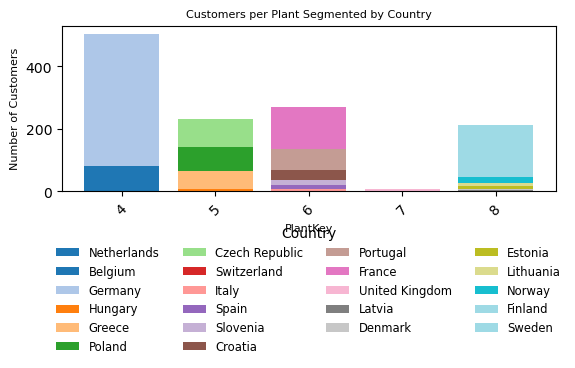

In [64]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

# Example of restructuring data for this purpose
# This assumes cust contains columns for CustomerCountry, PlantKey, and CustomerKey (or equivalent customer identifier)
data_aggregated = cust.groupby(['PlantKey', 'CustomerCountry']).agg({
    'CustomerKey': 'count'  # Count of customers by PlantKey and CustomerCountry
}).reset_index()

# Sorting (optional, for better visualization)
data_aggregated.sort_values(['PlantKey', 'CustomerKey'], inplace=True)

# Unique countries for color mapping
unique_countries = data_aggregated['CustomerCountry'].unique()
colors = plt.cm.tab20(np.linspace(0, 1, len(unique_countries)))
country_color_map = {country: color for country, color in zip(unique_countries, colors)}

# Plotting
plt.figure(figsize=(6, 4))

previous_plant = None
bottoms = np.zeros(len(data_aggregated['PlantKey'].unique()))

for _, row in data_aggregated.iterrows():
    plant_index = np.where(data_aggregated['PlantKey'].unique() == row['PlantKey'])[0][0]
    plt.bar(row['PlantKey'], row['CustomerKey'], bottom=bottoms[plant_index], 
            color=country_color_map[row['CustomerCountry']], label=row['CustomerCountry'])
    bottoms[plant_index] += row['CustomerKey']

plt.title('Customers per Plant Segmented by Country', size = 8)
plt.xlabel('PlantKey', size = 8)
plt.ylabel('Number of Customers', size = 8)
plt.xticks(rotation=45)
plt.legend(title='Country', bbox_to_anchor=(0.5, -0.15), loc='upper center', ncol=4, fontsize='small', frameon=False)
#plt.legend(title='Country', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

In [65]:
frcst_file = os.path.join(data_directory, 'Forecast.csv')
frcst = pd.read_csv(frcst_file)
print(frcst.head(2))
print(frcst.shape)

  RequestedDeliveryMonth  MaterialKey  PlantKey  Quantity  MaterialPlantKey
0             2022-01-01            1         4     15978             10004
1             2022-01-01            1         5      5360             10005
(480, 5)


In [66]:
# Inventory.csv
inventory_file = os.path.join(data_directory, 'Inventory.csv')
inventory = pd.read_csv(inventory_file)
print("Inventory.csv:")
print(inventory.head(2))
print(inventory.shape)

Inventory.csv:
   MaterialKey  PlantKey  MaterialPlantKey SnapshotDate  \
0            1         4             10004   2021-12-31   
1            1         5             10005   2021-12-31   

   GrossInventoryQuantity  OnShelfInventoryQuantity  InTransitQuantity  
0                  1753.0                      1626              127.0  
1                   794.0                       746               48.0  
(260, 7)


In [67]:
# MaterialPlantRelation.csv
material_plant_relation_file = os.path.join(data_directory, 'MaterialPlantRelation.csv')
material_plant_relation = pd.read_csv(material_plant_relation_file)
print("MaterialPlantRelation.csv:")
print(material_plant_relation.head(2))
print(material_plant_relation.shape)

MaterialPlantRelation.csv:
   MaterialKey  PlantKey  MaterialPlantKey  VendorKey  StandardCost Currency  \
0            1         4             10004       1001       2680.05      EUR   
1            1         5             10005       1002      11547.17      PLN   

   ProductionTime  InboundTransportationTime  GoodReceiptProcessingTime  \
0              20                          1                          2   
1              20                          1                          2   

   TotalInboundLeadTime  SafetyStockQty  
0                    23          1000.0  
1                    23           500.0  
(109, 11)


In [68]:
# Materials.csv
materials_file = os.path.join(data_directory, 'Materials.csv')
materials = pd.read_csv(materials_file)
print("Materials.csv:")
print(materials.head(2))
print(materials.shape)

Materials.csv:
   Material  MaterialKey      MaterialType MaterialDescription  \
0  EVCB-001            1  Finished Product      EV Car Battery   
1    HB-001            2  Finished Product        Home Battery   

       Product Category Component  
0   EV Car Battery - FP       NaN  
1  EV Home Battery - FP       NaN  
(33, 6)


In [73]:
# Plants.csv
plants_file = os.path.join(data_directory, 'Plants.csv')
plants = pd.read_csv(plants_file)
print("Plants.csv:")
print(plants.head())
#print(plants.shape)

Plants.csv:
   PlantKey Plant            PlantType           PlantName PlantCity  \
0         1  ANT1           Production  Antwerp Production   Antwerp   
1         2  WRO1           Production  Wrocław Production   Wrocław   
2         3  LYO1           Production     Lyon Production      Lyon   
3         4  ANT2  Distribution Center          Antwerp DC   Antwerp   
4         5  WRO2  Distribution Center          Wrocław DC   Wrocław   

  PlantPostalCode         PlantStreet  
0            2030         Scheldelaan  
1          54-202            Legnicka  
2           69160  Av. Mathieu Misery  
3            2030         Scheldelaan  
4          54-202            Legnicka  


In [70]:
# Purchases.csv
purchases_file = os.path.join(data_directory, 'Purchases.csv')
purchases = pd.read_csv(purchases_file)
print("Purchases.csv:")
print(purchases.head(2))
print(purchases.shape)

Purchases.csv:
   PurchaseOrder PurchaseOrderCreationDate  VendorKey  PlantKey  MaterialKey  \
0     4500000001                2023-06-07       1002         5            1   
1     4500000002                2023-03-05       1001         7            1   

   MaterialPlantKey  PurchaseOrderQuantity PlannedGoodsReceiptDate  \
0             10005                     69              2023-06-30   
1             10007                     80              2023-03-28   

  ActualGoodsReceiptDate PlannedArrivalDateYard ActualArrivalDateYard  \
0             2023-07-04             2023-06-28            2023-07-02   
1             2023-03-24             2023-03-26            2023-03-26   

  PlannedVendorShipmentDate ActualVendorShipmentDate  
0                2023-06-27               2023-07-01  
1                2023-03-25               2023-03-25  
(20000, 13)


In [71]:
# Sales.csv
sales_file = os.path.join(data_directory, 'Sales.csv')
sales = pd.read_csv(sales_file)
print("Sales.csv:")
print(sales.head(2))
print(sales.shape)

Sales.csv:
   SalesOrder  SalesOrderItem SalesOrderCreationDate  CustomerKey  \
0    10000001              10             2024-10-08          349   
1    10000002              10             2023-05-27          759   

   MaterialKey  OrderQuantity  PlantKey  MaterialPlantKey SalesDocType  \
0            1             26         4             10004      Regular   
1            1             20         5             10005      Regular   

  RequestedDeliveryDate DeliveryDate  HighOrderQtyFlag  
0            2024-11-15   2024-11-15                 0  
1            2023-06-15   2023-06-12                 0  
(100000, 12)


In [59]:
# sales year
# Requested Delivery Date vs Delivery Date 
country_sales = pd.merge(cust, sales, on='CustomerKey')
# Aggregate sales by country and find the most common PlantKey for each country
# sales_and_plant_by_country = country_sales.groupby('CustomerCountry').agg({
#     'OrderQuantity': 'sum',  # Sum of sales
#     'PlantKey': lambda x: x.mode()[0]  # Most common PlantKey
# }).reset_index()

country_sales.head(5)
#sales_and_plant_by_country
# # Sorting by sales for better visualization
# sales_and_plant_by_country.sort_values('OrderQuantity', inplace=True)

# # Step 3: Prepare color mapping
# unique_plants = sales_and_plant_by_country['PlantKey'].unique()
# colors = plt.cm.tab20(np.linspace(0, 1, len(unique_plants)))
# plant_color_map = {plant: color for plant, color in zip(unique_plants, colors)}

# # Step 4: Plotting
# plt.figure(figsize=(10, 4))
# for _, row in sales_and_plant_by_country.iterrows():
#     plt.bar(row['CustomerCountry'], row['OrderQuantity'], color=plant_color_map[row['PlantKey']])

# plt.title('Sales per Country')
# plt.ylabel('Order Quantity')
# plt.xticks(rotation=45, size=8)

# # Creating a legend
# from matplotlib.patches import Patch
# legend_elements = [Patch(facecolor=plant_color_map[plant], label=plant) for plant in unique_plants]
# plt.legend(handles=legend_elements, title='PlantKey', bbox_to_anchor=(1.05, 1), loc='upper left')

# plt.tight_layout()
# plt.show()

Unnamed: 0_x  CustomerKey     CustomerName CustomerCountry CustomerCity  \
0             1            1  O'Hara-MacGyver         Germany      Hamburg   
1             1            1  O'Hara-MacGyver         Germany      Hamburg   
2             1            1  O'Hara-MacGyver         Germany      Hamburg   
3             1            1  O'Hara-MacGyver         Germany      Hamburg   
4             1            1  O'Hara-MacGyver         Germany      Hamburg   

  CustomerPostalCode     CustomerStreet  PlantKey_x  Unnamed: 0_y  SalesOrder  \
0              22041  36 Westport Court           4           680    10000680   
1              22041  36 Westport Court           4           731    10000731   
2              22041  36 Westport Court           4           757    10000757   
3              22041  36 Westport Court           4          3345    10003345   
4              22041  36 Westport Court           4          3473    10003473   

   SalesOrderItem SalesOrderCreationDate  MaterialKey  OrderQuantity  \
0              10             2024-07-21            2             18   
1              10             2024-02-06            2             19   
2              10             2022-06-01            1             16   
3              10             2022-11-13            1             19   
4              10             2022-05-11            2             20   

   PlantKey_y  MaterialPlantKey SalesDocType RequestedDeliveryDate  \
0           4             20004      Regular            2024-08-26   
1           4             20004      Regular            2024-03-04   
2           4             10004      Regular            2022-07-01   
3           4             10004      Regular            2022-12-29   
4           4             20004      Regular            2022-05-30   

  DeliveryDate  HighOrderQtyFlag  
0   2024-09-09                 0  
1   2024-02-28                 0  
2   2022-06-30                 0  
3   2022-12-27                 0  
4   2022-05-25                 0

In [72]:
# Vendors.csv
vendors_file = os.path.join(data_directory, 'Vendors.csv')
vendors = pd.read_csv(vendors_file)
print("Vendors.csv:")
print(vendors.head(2))
print(vendors.shape)

Vendors.csv:
   VendorKey VendorTier          VendorName VendorCountry VendorCity  \
0       1001         T0  Antwerp Production       Belgium    Antwerp   
1       1002         T0  Wrocław Production        Poland    Wrocław   

  VendorPostalCode VendorStreet  
0             2030  Scheldelaan  
1           54-202     Legnicka  
(9, 7)
